# 画像処理

In [1]:
%matplotlib inline

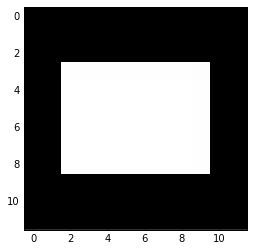

In [2]:
# 画像を読み込んで表示しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

plt.imshow( img, interpolation="None" )
plt.show()

"test.bmp"は[ここ](https://raw.githubusercontent.com/naka-tomo/practice_python/master/test.bmp)からダウンロードしてください．
(リンクを右クリックで「名前をつけて保存」で保存してください．)

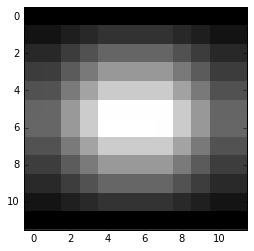

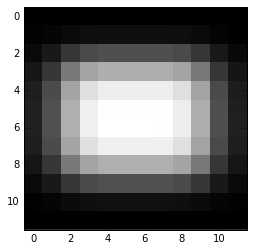

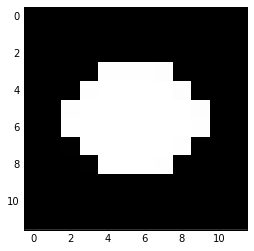

In [3]:
# 画像を平滑化しなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.blur(img,(5,5))
plt.imshow( img2, interpolation="None" )

img2 = cv2.GaussianBlur(img,(5,5), 0)
plt.figure()
plt.imshow( img2, interpolation="None" )

img2 = cv2.medianBlur(img,5)
plt.figure()
plt.imshow( img2, interpolation="None" )

plt.show()

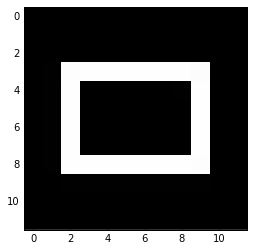

In [4]:
# エッジを抽出をしなさい
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("test.bmp")

img2 = cv2.Laplacian(img, cv2.CV_64F)

plt.imshow( img2, interpolation="None" )
plt.show()

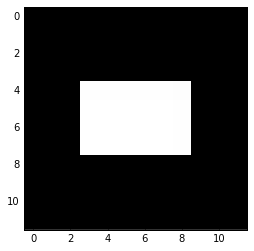

In [5]:
# 収縮処理をしなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")

kernel = np.ones((3,3),np.uint8)
img2 = cv2.erode(img,kernel,iterations = 1)

plt.imshow( img2, interpolation="None" )
plt.show()

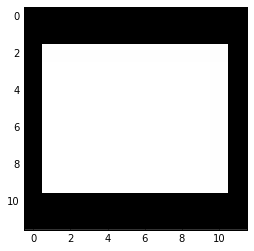

In [6]:
# 膨張処理をしなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")

kernel = np.ones((3,3),np.uint8)
img2 = cv2.dilate(img,kernel,iterations = 1)

plt.imshow( img2, interpolation="None" )
plt.show()

(5.5, 5.5)


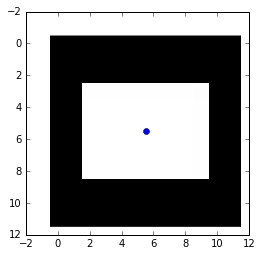

In [7]:
# 条件を満たす領域の重心位置を計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.bmp")
y, x = np.where( np.logical_and(img[:,:,0]==255, img[:,:,1]==255, img[:,:,2]==255) )

x = np.mean(x)
y = np.mean(y)

print (y, x)

plt.imshow( img, interpolation="None" )
plt.plot( [y], [x], "o" )
plt.show()

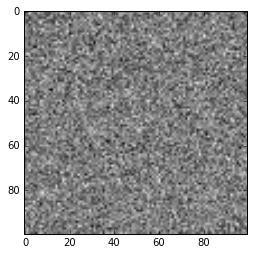

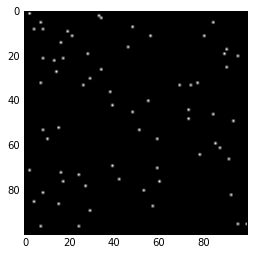

In [8]:
# 画像を二値化しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test2.bmp", 0 )

img2 = np.zeros( img.shape )
img2 = 255 * (img>200)

plt.imshow(img, cmap="gray")

plt.figure()
plt.imshow(img2, cmap="gray")
plt.show()

"test2.bmp"は[ここ](https://raw.githubusercontent.com/naka-tomo/practice_python/master/test2.bmp)からダウンロードしてください．
(リンクを右クリックで「名前をつけて保存」で保存してください．)

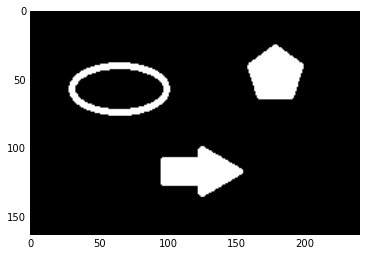

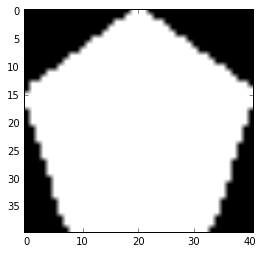

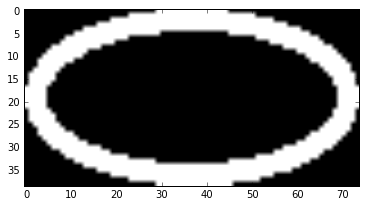

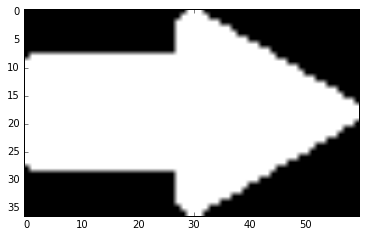

In [9]:
# 二値画像に対してラベリング処理をして画像中から図形を抽出しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test4.bmp", 0)

nlabels, labelimg, contours, centers = cv2.connectedComponentsWithStats(img)

plt.imshow(img, cmap="gray")

for x, y, w, h, _ in contours[1:]:
    shape = img[y:y+h, x:x+w]
    plt.figure()
    plt.imshow(shape, cmap="gray", vmin=0, vmax=255)

plt.show()

"test4.bmp"は[ここ](https://raw.githubusercontent.com/naka-tomo/practice_python/master/test4.bmp)からダウンロードしてください．
(リンクを右クリックで「名前をつけて保存」で保存してください．)

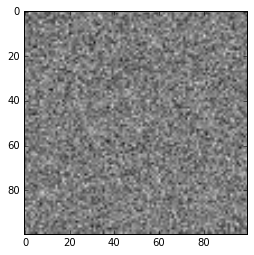

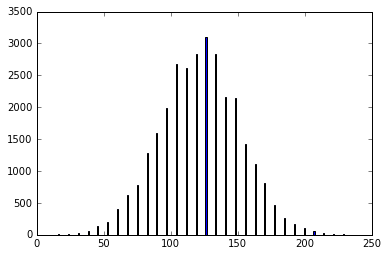

In [10]:
# グレー画像のヒストグラムを計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test2.bmp")

plt.imshow(img)

hist, bins = np.histogram( img, 30  )

plt.figure()
plt.bar( bins[:-1], hist )
plt.show()

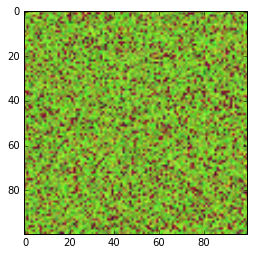

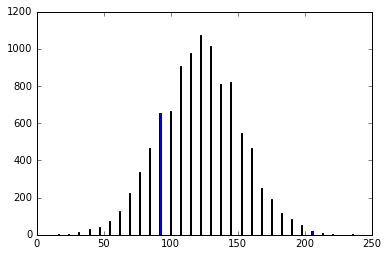

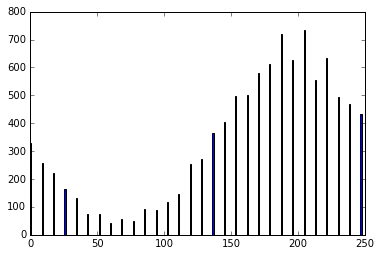

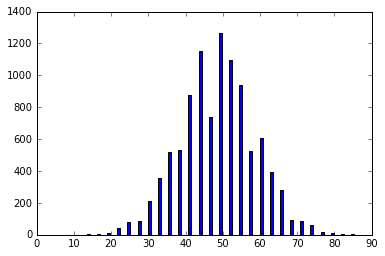

In [11]:
# カラー画像の各チャンネルのヒストグラムを計算しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

plt.imshow(img)

hist, bins = np.histogram( img[:,:,0], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

hist, bins = np.histogram( img[:,:,1], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

hist, bins = np.histogram( img[:,:,2], 30  )
plt.figure()
plt.bar( bins[:-1], hist )

plt.show()

"test3.bmp"は[ここ](https://raw.githubusercontent.com/naka-tomo/practice_python/master/test3.bmp)からダウンロードしてください．
(リンクを右クリックで「名前をつけて保存」で保存してください．)

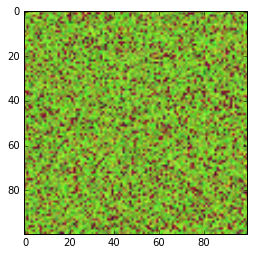

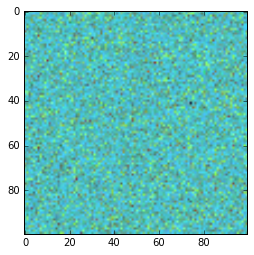

In [12]:
# BGRからHSVへ画像の色空間を変換しなさい
import cv2
import matplotlib.pyplot as plt

bgr = cv2.imread("test3.bmp")
hsv = cv2.cvtColor( img, cv2.COLOR_BGR2HSV )

plt.imshow(bgr)

plt.figure()
plt.imshow( hsv )
plt.show()

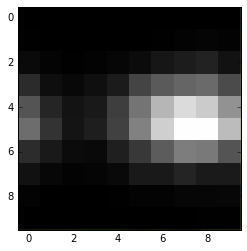

In [13]:
# RとGチャンネルの二次元ヒストグラムを作成し，濃淡画像として表示しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

plt.imshow(img)

hist, bins1, bins2= np.histogram2d( img[:,:,1].flatten(), img[:,:,2].flatten(), bins=(10, 10))
plt.imshow(hist.T, interpolation="None", cmap="gray")
plt.show()

In [14]:
# マウスでクリックされた位置の画素値を取得しなさい
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test3.bmp")

def mouse_event(event, x, y, flags, param):
    # 左クリックイベント
    if event == cv2.EVENT_LBUTTONDOWN:
        print x,y, "->", img[y, x]

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_event)
cv2.imshow( "image", img )

cv2.waitKey(0)
cv2.destroyAllWindows()

68 48 -> [107 137  44]
37 31 -> [140 247  44]
33 70 -> [143 198  57]


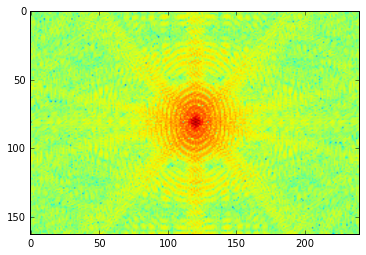

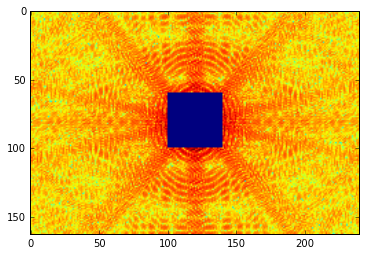

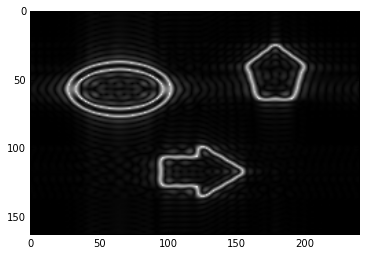

In [15]:
# 画像を高速フーリエ変換し，低周波成分をカットし，画像として出力しなさい
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("test4.bmp", 0)
fft = np.fft.fft2(img)
fft = np.fft.fftshift(fft)

fft_img = np.log(np.abs(fft) + 1)
plt.imshow(fft_img)

fft[60:100,100:140] = 0
fft_img = np.log(np.abs(fft) + 1)

plt.figure()
plt.imshow(fft_img)

fft = np.fft.ifftshift( fft )
img2 = np.fft.ifft2( fft )
img2 = np.abs( img2 )
plt.figure()
plt.imshow(img2, cmap="gray")

plt.show()

In [16]:
# トラックバーで指定したRGB値の単色画像を生成しなさい
import cv2
import numpy as np

img = np.zeros((300,300,3), dtype=np.uint8)

def chage_value(val):
    r = cv2.getTrackbarPos("R", "image")
    g = cv2.getTrackbarPos("G", "image")
    b = cv2.getTrackbarPos("B", "image")
    img[:,:,0] = b
    img[:,:,1] = g
    img[:,:,2] = r
   
    cv2.imshow( "image", img )

cv2.namedWindow("image")
cv2.imshow("image", img)

cv2.createTrackbar("R", "image", 0, 255, chage_value)
cv2.createTrackbar("G", "image", 0, 255, chage_value)
cv2.createTrackbar("B", "image", 0, 255, chage_value)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# トラックバーで指定したHSV値の単色画像を生成しなさい
import cv2
import numpy as np

img = np.zeros((300,300,3), dtype=np.uint8)

def chage_value(val):
    global img
    h = cv2.getTrackbarPos("H", "image")
    s = cv2.getTrackbarPos("S", "image")
    v = cv2.getTrackbarPos("V", "image")
    img[:,:,0] = h
    img[:,:,1] = s
    img[:,:,2] = v
    
    hsv = cv2.cvtColor( img, cv2.COLOR_HSV2BGR ) 
   
    cv2.imshow( "image", hsv )

cv2.namedWindow("image")
cv2.imshow("image", img)

cv2.createTrackbar("H", "image", 0, 255, chage_value)
cv2.createTrackbar("S", "image", 0, 255, chage_value)
cv2.createTrackbar("V", "image", 0, 255, chage_value)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# Webカメラから画像を取得しなさい
import cv2

capture = cv2.VideoCapture(0)
cv2.namedWindow("camera")

while True:
    ret, image = capture.read()

    if ret == False:
        continue

    cv2.imshow("camera", image)

    if cv2.waitKey(10) >= 0:
        cv2.imwrite("image.png", image)
        break

cv2.destroyAllWindows()

# 画像処理の応用
以下のサンプルでは学習済みのディープニューラルネットワークによって物体認識を行います．
モデルが定義されたファイル[bvlc_googlenet.prototxt](https://github.com/naka-tomo/practice_python/raw/master/data/bvlc_googlenet.prototxt)，モデルの学習されたパラメータが格納されているファイル[bvlc_googlenet.caffemodel](https://github.com/naka-tomo/practice_python/raw/master/data/bvlc_googlenet.caffemodel)，認識結果の整数値と物体名の対応が記述されたファイル[synset_words.txt](https://github.com/naka-tomo/practice_python/raw/master/data/synset_words.txt)をダウンロードし，作成したソースコードと同一ディレクトリに置いて下さい．
img_fileには，認識させたい画像のファイル名を指定します．

1: n06874185 traffic light, traffic signal, stoplight (0.999999)
2: n03976657 pole (0.000000)
3: n04286575 spotlight, spot (0.000000)
4: n06794110 street sign (0.000000)
5: n03691459 loudspeaker, speaker, speaker unit, loudspeaker system, speaker system (0.000000)


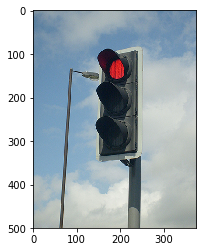

In [3]:
# 学習済みのdeep neural networkモデルを使った物体認識
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 読み込むファイルの名前
img_file = "traffic_light.png"
proto_file = "bvlc_googlenet.prototxt"
caffemodel_file = "bvlc_googlenet.caffemodel"
label_file = "synset_words.txt"

# 必要なファイルを読み込む
image = cv2.imread( img_file )
classes = open( label_file ).read().strip().split("\n")
net = cv2.dnn.readNetFromCaffe( proto_file, caffemodel_file)

# 認識処理
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))
net.setInput(blob)
preds = net.forward()

# 確信度の順番に並び替えて，トップ5のインデックスを取得
idxs = np.argsort(preds[0])[::-1][:5]

# トップ5の認識結果を文字列になおして表示
for i in range(len(idxs)):
    object_class = classes[idxs[i]]
    confidence = preds[0][idxs[i]]
    print( "%d: %s (%lf)" % (i+1, object_class, confidence))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

"traffic_light.png"は[ここ](https://raw.githubusercontent.com/naka-tomo/practice_python/master/traffic_light.png)からダウンロードしてください．
(リンクを右クリックで「名前をつけて保存」で保存してください．)

In [4]:
# 学習済みのdeep neural networkモデルを使った画像からの特徴量抽出
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 読み込むファイルの名前
proto_file = "bvlc_googlenet.prototxt"
caffemodel_file = "bvlc_googlenet.caffemodel"

# 必要なファイルを読み込む
image = cv2.imread( img_file )
net = cv2.dnn.readNetFromCaffe( proto_file, caffemodel_file)

# 認識処理
blob = cv2.dnn.blobFromImage(image, 1, (224, 224), (104, 117, 123))
net.setInput(blob)
preds = net.forward("pool5/7x7_s1")

features = preds[0, :, 0, 0]
print( features )

[ 0.12980628  1.72097063  0.48819199 ...,  0.63026583  0.          0.73916268]


以下のサンプルでは学習済みのディープニューラルネットワークによって物体認識を行います．
モデルが定義されたファイル[MobileNetSSD_deploy.prototxt](https://github.com/naka-tomo/practice_python/raw/master/data/MobileNetSSD_deploy.prototxt)，モデルの学習されたパラメータが格納されているファイル[MobileNetSSD_deploy.caffemodel](https://github.com/naka-tomo/practice_python/raw/master/data/MobileNetSSD_deploy.caffemodel)をダウンロードし，作成したソースコードと同一ディレクトリに置いて下さい．
img_fileには，認識させたい画像のファイル名を指定します．

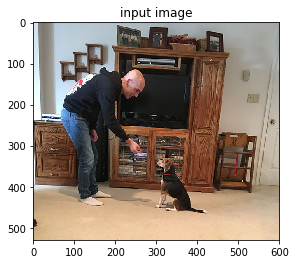

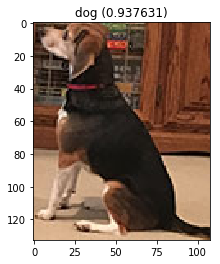

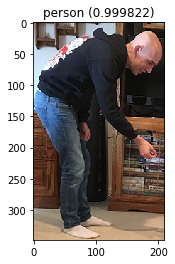

In [5]:
# 学習済みのdeep neural networkモデルを使った物体認識
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 読み込むファイルの名前
img_file = "dog.jpg"
proto_file = "MobileNetSSD_deploy.prototxt"
caffemodel_file = "MobileNetSSD_deploy.caffemodel"

classes = ["background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"]

# モデルの読み込み
net = cv2.dnn.readNetFromCaffe(proto_file, caffemodel_file)

# 画像の読み込み
image = cv2.imread(img_file)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0/(255.0/2.0), (300, 300), 255.0/2.0)
plt.title("input image")
plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

# 検出処理
net.setInput(blob)
detections = net.forward()[0,0,:,:]

# 見つかった物体でループ
for i in range(len(detections)):
    confidence = detections[i, 2]
    
    if confidence > 0.2:
        idx = int(detections[i, 1])
        
        # 画像上の左，上，右，下の座標を計算
        l = int(detections[i, 3] * w)
        t = int(detections[i, 4] * h)
        r = int(detections[i, 5] * w)
        b = int(detections[i, 6] * h)
        
        label = "%s (%lf)" % (classes[idx], confidence)
        plt.figure()
        plt.title(label)
        plt.imshow( cv2.cvtColor(image[t:b, l:r, :], cv2.COLOR_BGR2RGB) )

plt.show()

"dog.jpg"は[ここ](https://raw.githubusercontent.com/naka-tomo/practice_python/master/dog.jpg)からダウンロードしてください．
(リンクを右クリックで「名前をつけて保存」で保存してください．)